In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


<AxesSubplot: >

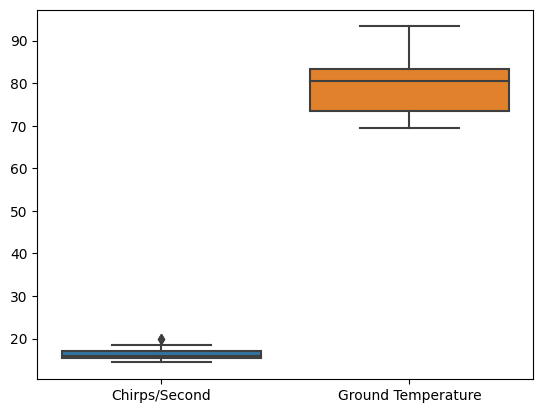

In [4]:
#visualizing data for outlier removal
import seaborn as sns
sns.boxplot(data=df)

In [5]:
#since only one feature  in x not applying scaling
# Min Max Scaling 
#from sklearn.preprocessing import MinMaxScaler
#MMS=MinMaxScaler()
#df[["Ground Temperature"]]=MMS.fit_transform(df[["Ground Temperature"]])
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [6]:
print(df["Ground Temperature"].value_counts())
df.info()

71.6    2
80.6    2
88.6    1
93.3    1
84.3    1
75.2    1
69.7    1
69.4    1
83.3    1
79.6    1
82.6    1
83.5    1
76.3    1
Name: Ground Temperature, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [7]:
X=df["Ground Temperature"]
y=df["Chirps/Second"]

In [8]:
print(X.shape)
print(y.shape)
X=X[:,np.newaxis]
print(X.shape)

(15,)
(15,)
(15, 1)


C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_3092\1693788325.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=X[:,np.newaxis]


Part1 
let us take the equation
y=mx+c
Chirps/Second=w1*(Ground Temperature)+w0

In [9]:
df["Chirps/Second"].corr(df["Ground Temperature"])
#+ve correlation

0.8320424586009417

In [10]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
#since less data not splitting data
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=0)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

In [11]:
#model training since less data taking 100 % data
LR.fit(X,y)

LinearRegression()

In [12]:
y_pred=LR.predict(X)

In [13]:
pd.DataFrame({'Actual':y,"Predicted":y_pred})

,Actual,Predicted
0,20.0,18.445091
1,16.0,14.994095
2,19.8,19.399190
3,18.4,17.572192
4,17.1,16.821093
5,15.5,15.724894
6,14.7,14.608396
7,15.7,14.994095
8,15.4,14.547496
9,16.3,17.369192


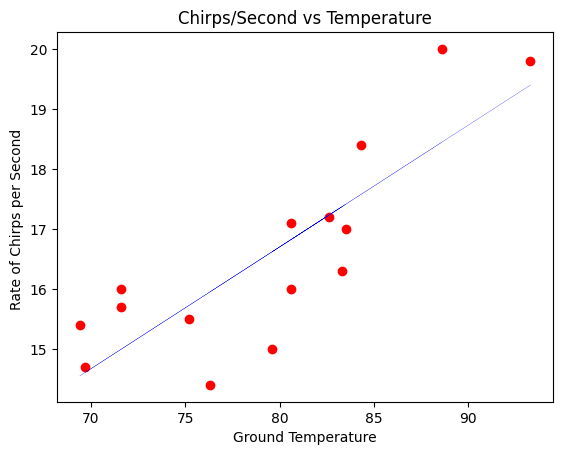

In [14]:
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)
# original data and the equation on the chart
plt.scatter(X,y,color="red")
plt.plot(X,y_pred,color="blue",linewidth=0.1)
plt.title('Chirps/Second vs Temperature')
plt.ylabel('Rate of Chirps per Second ')
plt.xlabel('Ground Temperature')
plt.show()

In [15]:
LR.intercept_       #w0

0.4593146452359598

In [16]:
LR.coef_    #w1

array([0.20299973])

#so equation becomes 
            Chirps/Second=(0.20299973)*Ground Temperature+0.4593146452359598

            y=w1*X+w0

In [17]:
LR.score(X,y)   #R2 score
#Not a strong correlation <0.8

0.6922946529147004

In [18]:
#Extrapolate data: If the ground temperature reached 95 and Chirps is 
y_sample=LR.predict([[95]])
y_sample

array([19.74428913])

In [19]:
#Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?
#y=mx+c
#chirps=temp*m+c
#chirps-c=temp*m
#temp=chirps-c/m
print("Ground Temperature for 18 chirps",(18-LR.intercept_)/LR.coef_)

Ground Temperature for 18 chirps [86.40743135]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [20]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [22]:
df.duplicated().sum()

0

<AxesSubplot: >

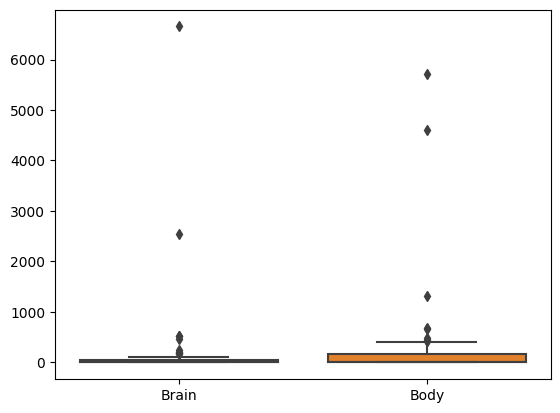

In [23]:
#visualizing data for outlier removal
import seaborn as sns
sns.boxplot(data=df)

min -70.80375000000001
max 119.60625
(array([ 3, 18, 20, 21, 27, 28, 32, 41, 55, 57], dtype=int64),)
(array([], dtype=int64),)


<AxesSubplot: >

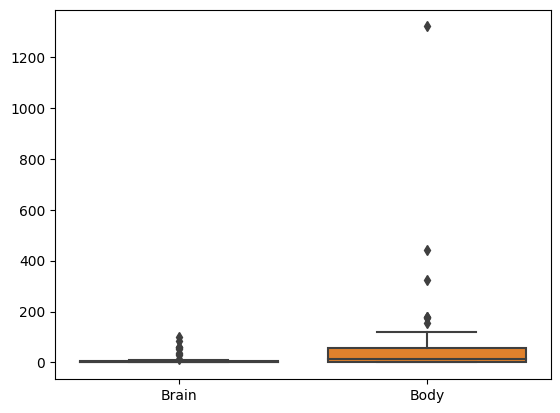

In [24]:
#outlier removal with IQR method in Brain
Q1=np.percentile(df["Brain"],25)
Q3=np.percentile(df["Brain"],75)
IQR=Q3-Q1
min=Q1-1.5*IQR
max=Q3+1.5*IQR
print("min",min)
print("max",max)
elements_more_than_max=df["Brain"]>=max
elements_less_than_min=df["Brain"]<=min
indices_of_upper_outlier=np.where(elements_more_than_max)
indices_of_lower_outlier=np.where(elements_less_than_min)
print(indices_of_upper_outlier)
print(indices_of_lower_outlier)
df.drop(indices_of_upper_outlier[0],inplace=True)
import seaborn as sns
sns.boxplot(data=df)
#removed outliers in Mileage columns

In [25]:
df.shape

(52, 2)

In [26]:
X=df["Brain"]
y=df["Body"]
print(X.shape)
print(y.shape)
X=X[:,np.newaxis]
print(X.shape)

(52,)
(52,)
(52, 1)


C:\Users\MURUGAN K\AppData\Local\Temp\ipykernel_3092\1501900575.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=X[:,np.newaxis]


Part1 let us take the equation y=mx+c Body=w1*(Brain)+w0

In [27]:
df["Body"].corr(df["Brain"])
#+ve correlation

0.5821230808891873

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
X_test=SS.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41, 1)
(11, 1)
(41,)
(11,)


In [29]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
#model training 
LR.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=LR.predict(X_test)

In [31]:
# original data and the equation on the chart
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
35,56.00,204.684593
45,440.00,295.134526
12,6.60,25.471441
42,12.10,33.377903
2,8.10,27.316282
37,1.00,20.832983
48,81.00,336.458970
39,0.25,20.253175
33,3.90,38.648879
5,115.00,165.995636


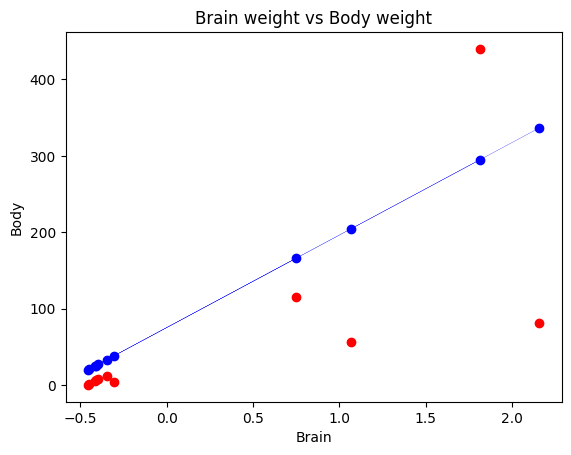

In [32]:
# original data and the equation on the chart
plt.scatter(X_test,y_test,color="red")
plt.scatter(X_test,y_pred,color= "blue")
plt.plot(X_test,y_pred,color="blue",linewidth=0.1)
plt.title('Brain weight vs Body weight')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [33]:
LR.intercept_       #w0

75.30902439024389

In [34]:
LR.coef_    #w1

array([121.0091154])

#so equation becomes 
            Body=(121.0091154)*Brain+75.30902439024389
            y=w1*X+w0

In [35]:
LR.score(X_test,y_test)   #R2 score

0.3201431650672405

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)    #R2 score
#Not a strong correlation <0.8

0.3201431650672405

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [37]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [38]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [40]:
df.duplicated().sum()

0

<AxesSubplot: >

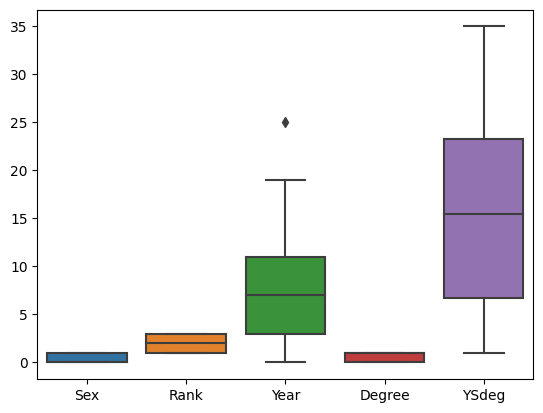

In [41]:
#visualizing data for outlier removal
import seaborn as sns
sns.boxplot(data=df.iloc[:,:-1])

min -9.0
max 23.0
(array([0], dtype=int64),)
(array([], dtype=int64),)


<AxesSubplot: >

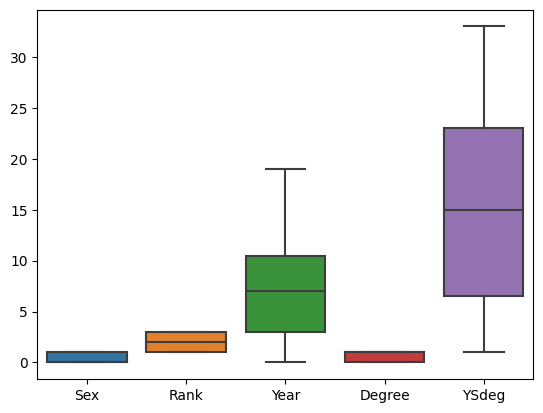

In [42]:
#outlier removal with IQR method in Brain
Q1=np.percentile(df["Year"],25)
Q3=np.percentile(df["Year"],75)
IQR=Q3-Q1
min=Q1-1.5*IQR
max=Q3+1.5*IQR
print("min",min)
print("max",max)
elements_more_than_max=df["Year"]>=max
elements_less_than_min=df["Year"]<=min
indices_of_upper_outlier=np.where(elements_more_than_max)
indices_of_lower_outlier=np.where(elements_less_than_min)
print(indices_of_upper_outlier)
print(indices_of_lower_outlier)
df.drop(indices_of_upper_outlier[0],inplace=True)   #updated in df
import seaborn as sns
sns.boxplot(data=df.iloc[:,:-1])
#removed outliers in Year columns

In [43]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(51, 5)
(51,)
(40, 5)
(11, 5)
(40,)
(11,)


In [44]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.220557,-0.383382,0.086533,-0.068712,-0.239125
Rank,-0.220557,1.000000,0.495556,-0.031178,0.686670,0.870674
Year,-0.383382,0.495556,1.000000,-0.212945,0.604651,0.664026
Degree,0.086533,-0.031178,-0.212945,1.000000,-0.530534,-0.105675
YSdeg,-0.068712,0.686670,0.604651,-0.530534,1.000000,0.647787
Salary,-0.239125,0.870674,0.664026,-0.105675,0.647787,1.000000


In [45]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
X_test=SS.transform(X_test)
#print(X_train)
#print(X_test)

In [46]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [47]:
#model training 
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [48]:
# original data and the equation on the chart
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
30,21600,20694.992586
12,28200,28951.755497
11,24750,25911.674956
23,38045,27878.273058
3,26775,26881.670341
29,23725,21973.822947
46,16150,16650.476301
33,20690,20368.964383
27,25500,27749.657340
5,28516,31720.338585


In [49]:
LR.intercept_       #w0

23118.175

In [50]:
LR.coef_    #w1

array([  226.59035251,  4887.98385208,  2484.08103256,  -775.44476526,
       -1703.12607936])

In [51]:
LR.score(X_test,y_test)   #R2 score

0.6000698666332507

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)    #R2 score
#Not a strong correlation <0.8

0.6000698666332507

In [53]:
names=list(df.columns)[:-1]
values=list(LR.coef_)
output_str=""
for i in range(len(names)):
    if str(values[i])[0]!="-":
        output_str=output_str+"+"+str(values[i])+"*"+str(names[i])
    else:
        output_str=output_str+str(values[i])+"*"+str(names[i])
print("equation is",output_str+"+"+str(LR.intercept_))

equation is +226.59035251288228*Sex+4887.983852075322*Rank+2484.081032558568*Year-775.4447652630166*Degree-1703.12607936314*YSdeg+23118.175


In [54]:
names=list(df.keys())[:-1]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
for i in names:
    X=df.loc[:,[i]]
    y=df.loc[:,"Salary"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    SS=StandardScaler()
    X_train=SS.fit_transform(X_train)
    X_test=SS.transform(X_test)
    LR=LinearRegression()
    #model training 
    LR.fit(X_train,y_train)
    y_pred=LR.predict(X_test)
    print(i,LR.score(X_test,y_test))   #R2 score
#the column is selected based on R2 score high R2 score have more impact on Salary prediction.

Sex -0.8929467236227029
Rank 0.5919414509879686
Year 0.02162372800512824
Degree -0.4278226680349768
YSdeg 0.0203790491095156


In [ ]:
#3.Report whether sex is a factor in salary.
#Sex column is not a factor in salary prediction.because it has low R2 score.